In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from half_normal_plotting import HalfNormPlot
from effects_table import yates_step, generate_standard_table
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import t

### 1)

In [2]:
#read in data
data = pd.read_excel("Assignment 3 Data.xlsx", sheet_name="question_1")
data['Block'] = data['Block'].apply(lambda x: "Block 1" if x == 1 else "Block 2")
data

,Block,A,B,C,y
0,Block 1,0,0,0,3
1,Block 1,1,0,0,6
2,Block 1,0,1,0,8
3,Block 1,1,1,0,10
4,Block 1,0,0,1,4
5,Block 1,1,0,1,6
6,Block 1,0,1,1,11
7,Block 1,1,1,1,9
8,Block 2,0,0,0,4
9,Block 2,1,0,0,4


In [3]:
q1_lm = ols('y ~ Block + A*B*C', data=data).fit()
anova = sm.stats.anova_lm(q1_lm)
anova['sd_effect'] = anova['mean_sq']**.5
anova

,df,sum_sq,mean_sq,F,PR(>F),sd_effect
Block,1.0,6.25,6.250000,6.481481,0.038334,2.500000
A,1.0,0.25,0.250000,0.259259,0.626283,0.500000
B,1.0,81.00,81.000000,84.000000,0.000038,9.000000
A:B,1.0,2.25,2.250000,2.333333,0.170471,1.500000
C,1.0,2.25,2.250000,2.333333,0.170471,1.500000
A:C,1.0,4.00,4.000000,4.148148,0.081107,2.000000
B:C,1.0,2.25,2.250000,2.333333,0.170471,1.500000
A:B:C,1.0,1.00,1.000000,1.037037,0.342410,1.000000
Residual,7.0,6.75,0.964286,NaN,NaN,0.981981


Based on the results of the Anova analysis we can see that only the B main effect is significant at the 5% level.  Looking at the data and keeping the goal of minimizing $y$ in mind we can see that whenever B is at the high level the response variable tends to be higher.  Lets formalize this insight by looking at this as a $2^1$ experiment with only factor B as the main effect and the other test runs considered replications of the experiment.

In [4]:
data_B = data[['Block','B','y']]
data_B

,Block,B,y
0,Block 1,0,3
1,Block 1,0,6
2,Block 1,1,8
3,Block 1,1,10
4,Block 1,0,4
5,Block 1,0,6
6,Block 1,1,11
7,Block 1,1,9
8,Block 2,0,4
9,Block 2,0,4


In [5]:
data_B.groupby(['Block','B']).agg(['mean','count'])

y      
           mean count
Block   B            
Block 1 0  4.75     4
        1  9.50     4
Block 2 0  3.75     4
        1  8.00     4

In [6]:
#calculate the LSD using t distribution and variance of difference in two means
LSD = t.ppf(1-.025, 45) * (anova.loc['Residual','mean_sq']**.5 * (1/4 + 1/4))
print(f"LSD for this experiment is {t.ppf(1-.025, 45):.04f}*({anova.loc['Residual','mean_sq']**.5:.04f}*(1/4+1/4))={LSD:.04f}")

LSD for this experiment is 2.0141*(0.9820*(1/4+1/4))=0.9889


We can see that for both blocks the difference in means is greater than the LSD so we can conclude that B does have a large and positive impact on $y$.  Knowing this and our goal of minimizing $y$ the recommendation from this experiment is to leave all treatment factors at the low level.

### 2) 

In [7]:
#read in data
q2_data = pd.read_excel("Assignment 3 Data.xlsx", sheet_name="question_2")
for col in ['A','B','C','D','E']:
    q2_data[col] = q2_data[col].map({0:'-',1:'+'})
q2_data

,Block,A,B,C,D,E,y
0,block_1,-,-,-,-,-,23
1,block_1,-,-,+,-,-,24
2,block_1,-,+,-,-,-,27
3,block_1,-,+,+,-,-,30
4,block_1,+,-,-,-,-,15
5,block_1,+,-,+,-,-,20
6,block_1,+,+,-,-,-,27
7,block_1,+,+,+,-,-,31
8,block_2,-,-,-,-,+,20
9,block_2,-,-,+,-,+,21


In [20]:
q2_lm = ols('y ~ Block + A + B + C + D + E + A:B + A:C + A:D + A:E + B:C + B:D + B:E + C:D + C:E + D:E', data=q2_data).fit(method='qr')
q2_anova = sm.stats.anova_lm(q2_lm, typ=2)
q2_anova['significant'] = q2_anova['PR(>F)'].apply(lambda x: True if x < .05 else False)
# q2_anova['std_effects'] = q2_anova['mean_sq']**.5
q2_anova

,sum_sq,df,F,PR(>F),significant
Block,2.476227e+17,3.0,1.356691e+16,1.904095e-123,True
A,9.054556e+01,1.0,1.488261e+01,1.392245e-03,True
B,4.295505e+02,1.0,7.060349e+01,2.916129e-07,True
C,5.873895e+01,1.0,9.654684e+00,6.776903e-03,True
D,2.665698e+17,1.0,4.381500e+16,6.209781e-125,True
E,1.662182e+17,1.0,2.732062e+16,2.717279e-123,True
A:B,4.189844e+01,1.0,6.886677e+00,1.841036e-02,True
A:C,1.321558e+00,1.0,2.172192e-01,6.474490e-01,False
A:D,5.201338e+01,1.0,8.549230e+00,9.935273e-03,True
A:E,1.392710e+02,1.0,2.289141e+01,2.026340e-04,True


An estimate of the experimental error is 3.360 with 16 degrees of freedom, and the main effects $A, B, C$ are significant with interaction effects $A*B,\;\;A*D,\;\;A*E,\;\;B*C$ significant at the 5% alpha level.

In [9]:
def encode_effect(X):
    A, B, C, D, E = X
    effect = []
    if A == 1:
        effect.append('a')
    if B == 1: 
        effect.append('b')
    if C == 1: 
        effect.append('c')
    if D == 1: 
        effect.append('d')
    if E == 1:
        effect.append('e')
    if len(effect) > 0:
        return ''.join(effect)
    else:
        return '(1)'

In [10]:
q2_yates = q2_data.copy()
q2_yates['step_1'] = yates_step(q2_yates['y'].tolist())
q2_yates['step_2'] = yates_step(q2_yates['step_1'].tolist())
q2_yates['step_3'] = yates_step(q2_yates['step_2'].tolist())
q2_yates['step_4'] = yates_step(q2_yates['step_3'].tolist())
q2_yates['step_5'] = yates_step(q2_yates['step_4'].tolist())
q2_yates['std_effect'] = q2_yates['step_5'] / (len(q2_data)**.5)
q2_yates['effect'] = q2_yates[['A','B','C','D','E']].apply(encode_effect, axis=1)
q2_yates

,Block,A,B,C,D,E,y,step_1,step_2,step_3,step_4,step_5,std_effect,effect
0,block_1,-,-,-,-,-,23,47,104,197,396,833,147.254987,(1)
1,block_1,-,-,+,-,-,24,57,93,199,437,51,9.015611,(1)
2,block_1,-,+,-,-,-,27,35,90,227,22,119,21.036427,(1)
3,block_1,-,+,+,-,-,30,58,109,210,29,-27,-4.772971,(1)
4,block_1,+,-,-,-,-,15,41,111,13,64,53,9.369165,(1)
5,block_1,+,-,+,-,-,20,49,116,9,55,7,1.237437,(1)
6,block_1,+,+,-,-,-,27,43,85,11,-6,43,7.601398,(1)
7,block_1,+,+,+,-,-,31,66,125,18,-21,-7,-1.237437,(1)
8,block_2,-,-,-,-,+,20,52,4,33,8,-15,-2.651650,(1)
9,block_2,-,-,+,-,+,21,59,9,31,45,3,0.530330,(1)


In [11]:
q2_hn = HalfNormPlot(data=q2_yates.iloc[1:,:], data_col='std_effect', label_col='effect')
q2_hn.half_norm_data

C:\Users\aburtnerabt\Documents\K-State\Experimental Design\half_normal_plotting.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.half_norm_data[self.abs_col] = self.half_norm_data[data_col].apply(lambda x: abs(x))


,Block,A,B,C,D,E,y,step_1,step_2,step_3,step_4,step_5,std_effect,effect,abs_std_effect,r_i,r_i*,p_i,v_i
0,block_2,+,+,-,-,+,32,53,9,-5,-6,-1,-0.176777,(1),0.176777,1.0,0.016129,0.508065,0.020216
1,block_4,+,+,+,+,+,36,0,-9,-2,-3,-3,-0.530330,(1),0.530330,2.0,0.048387,0.524194,0.060681
2,block_4,+,-,+,+,+,31,1,-2,-3,-3,3,0.530330,(1),0.530330,3.0,0.080645,0.540323,0.101246
3,block_4,-,+,+,+,+,25,0,-5,6,7,-3,-0.530330,(1),0.530330,4.0,0.112903,0.556452,0.141979
4,block_2,-,-,+,-,+,21,59,9,31,45,3,0.530330,(1),0.530330,5.0,0.145161,0.572581,0.182948
5,block_2,+,+,+,-,+,34,72,9,-16,-1,-3,-0.530330,(1),0.530330,6.0,0.177419,0.588710,0.224227
6,block_3,+,+,+,+,-,33,2,19,0,-11,5,0.883883,(1),0.883883,7.0,0.209677,0.604839,0.265892
7,block_4,+,-,-,+,+,22,8,-3,-3,2,5,0.883883,(1),0.883883,8.0,0.241935,0.620968,0.308023
8,block_4,+,+,-,+,+,36,9,-7,1,0,-5,-0.883883,(1),0.883883,9.0,0.274194,0.637097,0.350709
9,block_1,+,-,+,-,-,20,49,116,9,55,7,1.237437,(1),1.237437,10.0,0.306452,0.653226,0.394044


<AxesSubplot: title={'center': 'Assignment 3 Question 2 Half Normal Plot'}, xlabel='abs_std_effect', ylabel='V_i'>

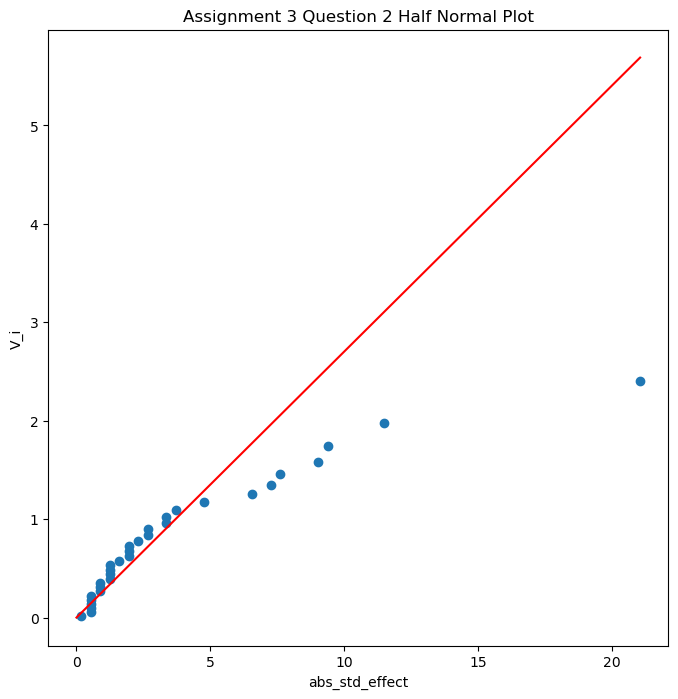

In [12]:
q2_hn.plot_half_norm(title="Assignment 3 Question 2 Half Normal Plot", data_percent=.8)

<AxesSubplot: title={'center': 'Half Normal Plot Removing Significant Effects'}, xlabel='abs_std_effect', ylabel='V_i'>

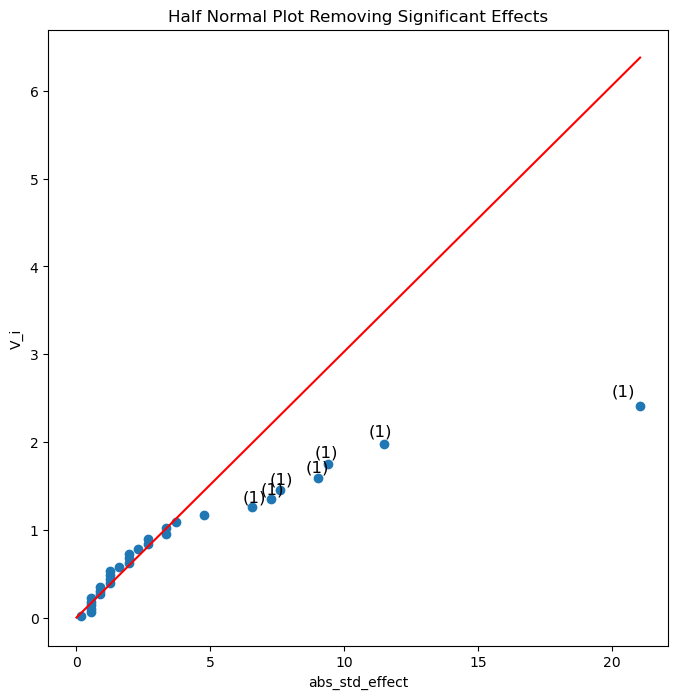

In [13]:
q2_hn.plot_half_norm(title="Half Normal Plot Removing Significant Effects", num_adjust=7)

In [14]:
q2_hn.sigma_from_adjusted_regression()

3.297470627770748